# Symbolic analysis

### Purpose:
Pi loss breakdown chart for Open journal of PE

# Cell 1: Install packages and configure matplotlib

In [1]:
# Install commonly used data analysis packages
import subprocess
import sys
import pandas as pd

import pandas as pd
import numpy as np
import math
import sympy as sp
from sympy import I
from sympy import *
from sympy import re as real
import random


packages = ['pandas', 'matplotlib', 'numpy', 'scipy', 'openpyxl', 'xlrd']
for package in packages:
    print(f"Installing {package}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
print("All packages installed successfully!")

# Set default matplotlib plot parameters
import matplotlib.pyplot as plt
import matplotlib
plt.style.reload_library()
matplotlib.rcParams.update({
    'font.size': 7,
    'font.family': 'STIXGeneral',
    'mathtext.fontset': 'stix'
})

# Plot formatting parameters
fig_width = 4  # cm
fig_height = 3  # cm
font_size = 7  # pt
marker_size = 5
x_tick_pad = 2
y_tick_pad = 2
x_label_pad = 0.5
y_label_pad = 1
resolution = 300

# Load data from Excel file
df = pd.read_excel('MagneticParameters.xlsx')
pi = math.pi
Vdc = 400
Vbat = 400
L1_x0y0 = 24.42*10**(-6)
Lr_x0y0 = 22.02*10**(-6)
k_x0y0 = df.loc[2, 'k_x0_y0']#0.223015 # center of the operation point
k_lim = df.loc[2, 'k_lim']
Lf = 5.31*10**(-6) #H
Cf = 0.66*10**(-6) #F
f = 85*(10**3) #Hz
QL = 400
QC = 500
omega0 = 2*pi*f #[rad/s]
Pout=50000 #W

Installing pandas...
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Installing matplotlib...
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Installing numpy...
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Installing scipy...
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Installing openpyxl...
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Installing xlrd...
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


All packages installed successfully!


# Cell 2: Load constants, parameters, and compute losses and efficiency

In [2]:


pi = math.pi
c1 = 1.1917956269876
c2 = 3.10271352331286
Req2 = omega0*Vbat*L1_x0y0**0.5*Lr_x0y0*c1*abs(k_lim**2-k_x0y0**2)/(k_x0y0*(Lr_x0y0*Vdc**2-L1_x0y0*Vbat**2*k_x0y0**2*c2**2*c1**2)**0.5) 
c3 = 8*Lr_x0y0*Vdc**2*k_x0y0**2*Req2/(math.pi**2*Pout*L1_x0y0*c1**2*(omega0**2*Lr_x0y0**2*(k_lim**2-k_x0y0**2)**2 + Req2**2*k_x0y0**4*c2**2)) 
Req = omega0*c1*c3*Vbat*L1_x0y0**0.5*Lr_x0y0*(k_lim**2-k_x0y0**2)/(k_x0y0*(Lr_x0y0*Vdc**2-L1_x0y0*Vbat**2*k_x0y0**2*c1**2*c2**2)**0.5) 
I1a_k_x0y0 = (4*Vdc*k_x0y0**2*(Lr_x0y0**2*c3**2*omega0**2+Req**2*c2**2)**0.5/(pi*omega0*L1_x0y0*k_lim**2*c1**2*c2*c3*(Lr_x0y0**2*c3**2*omega0**2*(k_lim**2-k_x0y0**2)**2+Req**2*k_x0y0**4*c2**2)**0.5))/math.sqrt(2) 
I1b_k_x0y0 = (4*Lr_x0y0*Vdc/(pi*L1_x0y0*c1*c2*(Lr_x0y0**2*c3**2*omega0**2*(k_lim**2-k_x0y0**2)**2+Req**2*k_x0y0**4*c2**2)**0.5))/math.sqrt(2) 
I1b_0  = (4*Lr_x0y0*Vdc/(pi*L1_x0y0*c1*c2*(Lr_x0y0**2*c3**2*omega0**2*(k_lim**2)**2+Req**2*0**4*c2**2)**0.5))/math.sqrt(2) 
I2a_k_x0y0 = (4*k_x0y0*Vdc*Lr_x0y0**0.5/(pi*L1_x0y0**0.5*c1*(Lr_x0y0**2*c3**2*omega0**2*(k_lim**2-k_x0y0**2)**2+Req**2*k_x0y0**4*c2**2)**0.5))/math.sqrt(2) 
I2b_k_x0y0 = (4*Vdc*k_x0y0*(Lr_x0y0**2*c3**2*omega0**2+Req**2*c2**2)**0.5/(pi*omega0*(L1_x0y0*Lr_x0y0)**0.5*c1*(Lr_x0y0**2*c3**2*omega0**2*(k_lim**2-k_x0y0**2)**2+Req**2*k_x0y0**4*c2**2)**0.5))/math.sqrt(2) 
delta_I1b = abs(I1b_k_x0y0/I1b_0) 

VL1 = abs(I1b_k_x0y0*(omega0*L1_x0y0))  # Vrms
VL2 = abs(-I2b_k_x0y0*omega0*Lr_x0y0)  #Vrms

C1sa = 1/(omega0**2*L1_x0y0*k_lim**2*c2*c3*c1*(c1-1)) 
C1sb = 1/(omega0**2*L1_x0y0*(1-k_lim**2*c1*c2*c3)) 
C1pa = 1/(L1_x0y0*k_lim**2*c1*c2*c3*omega0**2) 
C2pa = c2/(Lr_x0y0*omega0**2) 
C2sb = c2/(Lr_x0y0*omega0**2*(c2-1)) 
C2sa = c2/(Lr_x0y0*omega0**2*(c3-1)) 

rL1 = omega0*L1_x0y0/QL 
rC1sa = 1/(omega0*C1sa*QC) 
rC1pa = 1/(omega0*C1pa*QC) 
rC1sb = 1/(omega0*C1sb*QC) 
rL2 = omega0*Lr_x0y0/QL 
rC2sa = 1/(omega0*C2sa*QC) 
rC2pa = 1/(omega0*C2pa*QC) 
rC2sb = 1/(omega0*C2sb*QC) 
rLf = omega0*Lf/QL 
rCf = 1/(omega0*Cf*QC) 

Loss_L1 = abs(rL1*I1b_k_x0y0**2) 
Loss_L1_0 = rL1*I1b_0**2 
Loss_C1sa = abs(rC1sa*I1a_k_x0y0**2) 
Loss_C1pa = abs(rC1pa*I1b_k_x0y0**2) 
Loss_C1pa_0 = rC1pa*I1b_0**2 
Loss_C1sb = abs(rC1sb*I1b_k_x0y0**2) 
Loss_C1sb_0 = rC1sb*I1b_0**2 
Loss_L2 = abs(rL2*I2b_k_x0y0**2) 
Loss_C2sb = abs(rC2sb*I2b_k_x0y0**2) 
Loss_C2pa = abs(rC2pa*I2b_k_x0y0**2) 
Loss_C2sa = abs(rC2sa*I2a_k_x0y0**2) 
Loss_Lf = abs(rLf*I1a_k_x0y0**2) 
Loss_Cf = abs(rCf*I1a_k_x0y0**2) 

rSW = 3.7*10**(-3)*2 # Datasheet of CAS325M12HM2
Vforward = 1.6*2 #Datasheet of CAS325M12HM2
Loss_SW = abs(rSW*I1a_k_x0y0**2) 
Loss_Vforward = abs(Vforward*I2a_k_x0y0) 

Loss_Snubber = 10 + 5 # W
Loss_Snubber_iteration = Loss_Snubber 

Loss_single_total = Loss_L1+Loss_C1sa+Loss_C1sb+Loss_C1pa+Loss_L2+Loss_C2sb+Loss_C2sa+Loss_C2pa+Loss_SW+Loss_Vforward+Loss_Lf+Loss_Cf+Loss_Snubber
                     
Loss_four_total = Loss_L1+Loss_L1_0*3+Loss_C1sa+Loss_C1sb+Loss_C1sb_0*3+Loss_C1pa+Loss_C1pa_0*3+Loss_L2+Loss_C2sb+Loss_C2sa+Loss_C2pa+Loss_SW+Loss_Vforward+Loss_Lf+Loss_Cf+Loss_Snubber 
Loss_coil =  Loss_L1+Loss_L2 
eff_four = (Pout/(Pout + abs(Loss_four_total)))*100 
eff_single = (Pout/(Pout + abs(Loss_single_total)))*100 
eff_coil = (Pout/(Pout + abs(Loss_coil)))*100 
Pout_k_x0y0 = abs(Req*I2a_k_x0y0**2) 


# Cell 3: Visualize the loss distribution with a pie chart

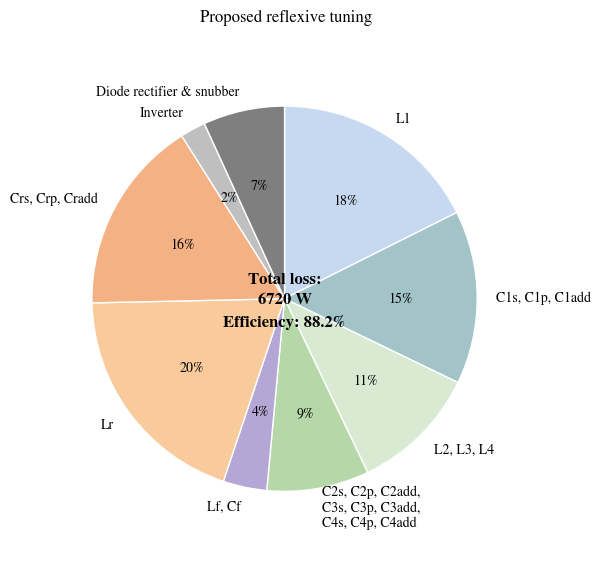

In [3]:
# Cell 3
import matplotlib.pyplot as plt

losses_ordered = {
    "L1": Loss_L1,
    "C1s, C1p, C1add": Loss_C1sa + Loss_C1sb + Loss_C1pa,
    "L2, L3, L4": Loss_L1_0*3,
    "C2s, C2p, C2add,\nC3s, C3p, C3add,\nC4s, C4p, C4add":   (Loss_C1sb_0 + Loss_C1pa_0)*3,
    "Lf, Cf": Loss_Lf + Loss_Cf,
    "Lr": Loss_L2,  # placeholder to simulate 20%
    "Crs, Crp, Cradd": Loss_C2sb + Loss_C2pa + Loss_C2sa,  # placeholder to simulate 16%
    "Inverter": Loss_SW,
    "Diode rectifier & snubber": Loss_Vforward + Loss_Snubber
}

labels = list(losses_ordered.keys())
sizes = list(losses_ordered.values())
total_loss = sum(sizes)

colors = [
    "#c6d9f1",  # L1
    "#a2c4c9",  # C1 group
    "#d9ead3",  # L2 group
    "#b6d7a8",  # C2~C4 group
    "#b4a7d6",  # Lf, Cf
    "#f9cb9c",  # Lr
    "#f4b183",  # Crs, Crp, Cradd
    "#bfbfbf",  # Inverter
    "#7f7f7f"   # Diode + Snubber
]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.0f%%',
    startangle=90,
    colors=colors,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

ax.text(0, 0.10, "Total loss:", ha='center', va='center', fontsize=12, weight='bold')
ax.text(0, 0.00, f"{int(total_loss)} W", ha='center', va='center', fontsize=12, weight='bold')
ax.text(0, -0.12, f"Efficiency: {eff_four:.1f}%", ha='center', va='center', fontsize=12, weight='bold')

ax.axis('equal')
plt.title(" Proposed reflexive tuning", fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

# Create DataFrame from the ordered loss dictionary (used in Cell 3)
df_losses = pd.DataFrame({
    'Loss Item': list(losses_ordered.keys()),
    'Loss [W]': list(losses_ordered.values())
})

# Save to Excel
output_file = 'LossBreakdown_Reflexive.xlsx'
df_losses.to_excel(output_file, index=False)

print(f"Loss breakdown data has been saved to '{output_file}'. You can now create a pie chart in Excel using this data.")


Loss breakdown data has been saved to 'LossBreakdown_Reflexive.xlsx'. You can now create a pie chart in Excel using this data.
